In [31]:
%matplotlib inline

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nb
import pickle
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [36]:
annot = np.array(nb.load('/home/julia/data/gradients/allen_atlas/annot_finest_200um.nii.gz').get_data(), dtype='float64')
gradient = nb.load('/home/julia/data/gradients/results/embedding/embed.nii.gz').get_data()
mask = nb.load('/home/julia/data/gradients/allen_atlas/cortex_mask_tight_200um.nii.gz').get_data()

for g in range(6):
    g_masked = gradient[:,:,:,g]
    g_masked[mask==0] = np.nan
    
    g_dict = {}
    for region in df['id']:
        acronym = df.loc[df['id']==region, 'acronym'].values[0]
        g_dict[acronym] = g_masked[annot==region]
        
    with open('/home/julia/data/gradients/results/embedding/gradient%i_by_cluster.pkl' % g, 'wb') as f:
        pickle.dump(g_dict, f)

/home/julia/workspace/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.
/home/julia/workspace/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
/home/julia/workspace/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of

## Connectivity gradients

In [37]:
df = pd.read_csv('/home/julia/workspace/mouse_gradients/regions.csv')
df = df.drop(columns=['Unnamed: 0', 'comment'])
df = df.dropna()
df = df.reindex()

In [38]:
df.loc[df['acronym']=='MOp', 'cluster'] = 'motor'
df.loc[df['acronym']=='MOs', 'cluster'] = 'motor'
df.loc[df['acronym']=='SSp-n', 'cluster'] = 'nose'
df.loc[df['acronym']=='SSp-bfd', 'cluster'] = 'nose'
df.loc[df['cluster']=='somatomotor', 'cluster'] = 'somatosensory'

In [40]:
with open('/home/julia/data/gradients/results/embedding/gradient2_by_cluster.pkl', 'rb') as f:
    g2 = pickle.load(f)
with open('/home/julia/data/gradients/results/embedding/gradient4_by_cluster.pkl', 'rb') as f:
    g4 = pickle.load(f)
with open('/home/julia/data/gradients/results/embedding/gradient1_by_cluster.pkl', 'rb') as f:
    g1 = pickle.load(f)
with open('/home/julia/data/gradients/results/embedding/gradient3_by_cluster.pkl', 'rb') as f:
    g3 = pickle.load(f)
with open('/home/julia/data/gradients/results/embedding/gradient0_by_cluster.pkl', 'rb') as f:
    g0 = pickle.load(f)
with open('/home/julia/data/gradients/results/embedding/gradient5_by_cluster.pkl', 'rb') as f:
    g5 = pickle.load(f)

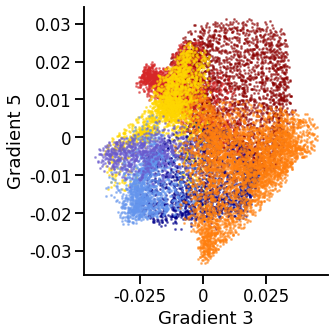

In [41]:
clusters = ['motor', 'prefrontal','lateral', 'medial', 'visual', 'auditory', 'somatosensory','nose']
colors = ['darkred', 'tab:red', 'gold', 'darkblue','cornflowerblue','slateblue', 'tab:orange','tab:orange']
sns.set_context('talk')
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(g2[r], g4[r], color=colors[c], label=clusters[c], alpha=0.5, s=2)
plt.yticks([-0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03], [-0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03])
plt.xticks([-0.025, 0, 0.025], [-0.025, 0, 0.025])

plt.xlabel('Gradient 3')
plt.ylabel('Gradient 5')
plt.tight_layout()
sns.despine()
fig.savefig("/home/julia/Documents/projects/mouse_gradients/scatter_g3_5.svg")

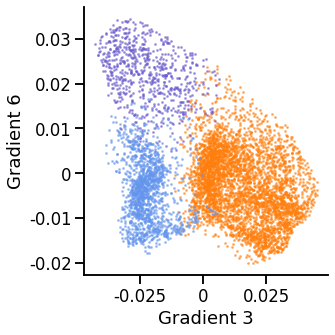

In [42]:
clusters = ['somatosensory', 'nose','auditory', 'visual']
colors = ['tab:orange','tab:orange','slateblue', 'cornflowerblue']
sns.set_context('talk')
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(g2[r], g5[r], color=colors[c], label=clusters[c], alpha=0.5, s=2)
plt.yticks([-0.02, -0.01, 0, 0.01, 0.02, 0.03], [-0.02, -0.01, 0, 0.01, 0.02, 0.03])
plt.xticks([-0.025, 0, 0.025], [-0.025, 0, 0.025])
plt.xlabel('Gradient 3')
plt.ylabel('Gradient 6')
plt.tight_layout()
sns.despine()
fig.savefig("/home/julia/Documents/projects/mouse_gradients/scatter_g3_6.svg")

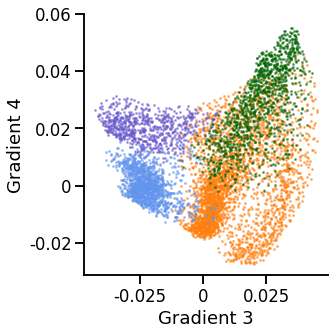

In [46]:
clusters = ['somatosensory', 'auditory', 'visual', 'nose']
colors = ['tab:orange','slateblue', 'cornflowerblue', 'darkgreen']
sns.set_context('talk')
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(g2[r], g3[r], color=colors[c], label=clusters[c], alpha=0.5, s=2)
plt.yticks([-0.02, 0, 0.02, 0.04, 0.06], [-0.02, 0, 0.02, 0.04, 0.06])
plt.xticks([-0.025, 0, 0.025], [-0.025, 0, 0.025])
plt.xlabel('Gradient 3')
plt.ylabel('Gradient 4')
plt.tight_layout()
sns.despine()
fig.savefig("/home/julia/Documents/projects/mouse_gradients/scatter_g3_4.svg")

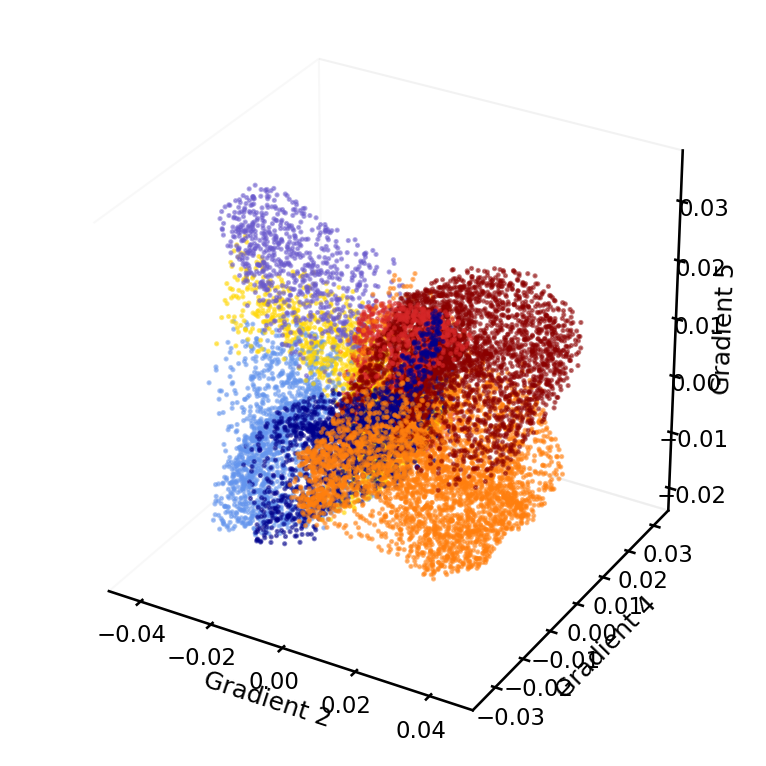

In [10]:
clusters = ['motor', 'somatosensory', 'nose','prefrontal','lateral', 'medial', 'visual', 'auditory']
colors = ['darkred', 'tab:orange', 'tab:orange','tab:red', 'gold', 'darkblue','cornflowerblue','slateblue']
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, projection='3d')

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        ax.scatter(xs=g2[r], ys=g4[r], zs=g5[r], color=colors[c], label=clusters[c], alpha=0.5, s=5)
#ax.set_xlim(-0.025, 0.045)
#ax.set_ylim(-0.025, 0.045)
#ax.set_zlim(-0.035, 0.035)

ax.grid(False) 
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False

ax.set_xlabel('Gradient 2')
ax.set_ylabel('Gradient 4')
ax.set_zlabel('Gradient 5')
plt.tight_layout()